# Classification  Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture.




## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

## Get the Data
**Read the'KNN_Data'csv file into a dataframe.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project
# Varshith mounted the Drive using drive.mount()

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith read the KNN_Data excel file to varshith_data using Pandas
x="/content/drive/MyDrive/Colab Notebooks/KNN_Data.xlsx"
vars_data=pd.read_excel(x)




**Check the head of the dataframe.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project
# Varshith displayed the head of the varshith_data dataframe using head()

vars_data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

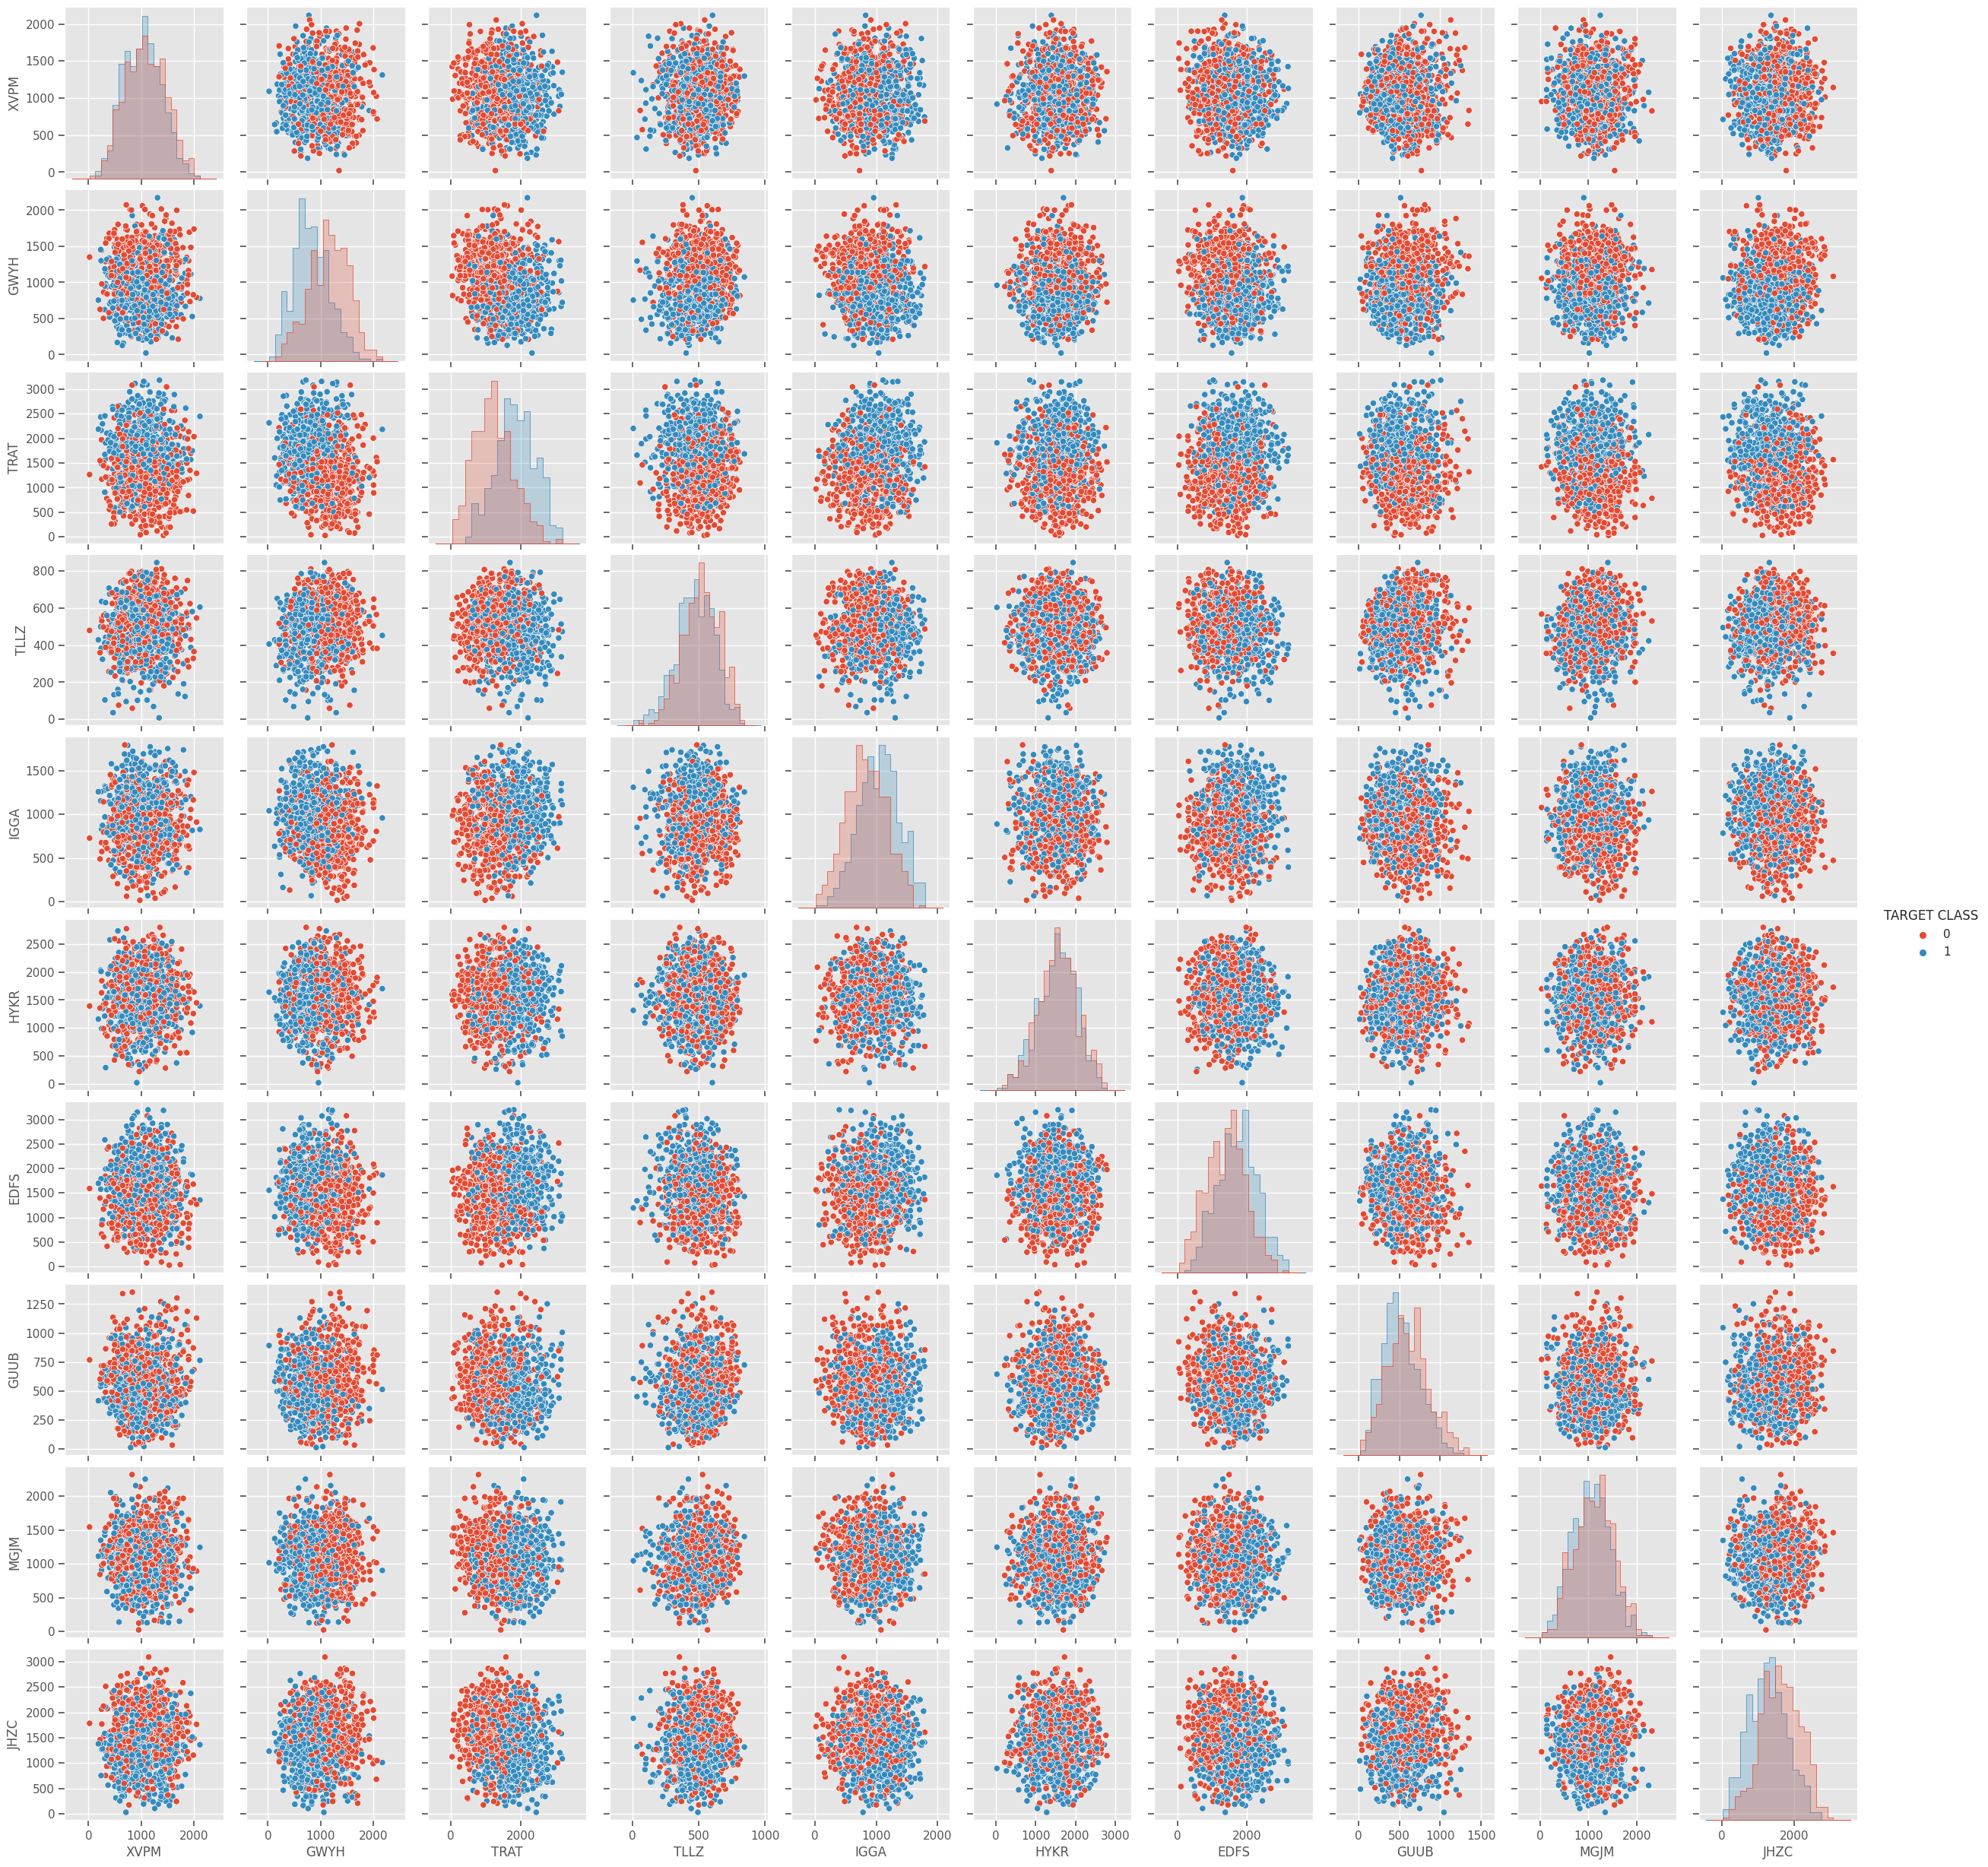

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith using pairplot() in seaborn libraries to plot large pairplot
vars_plot= sns.pairplot(vars_data, hue='TARGET CLASS')

# Varshith included steps in Histogram
vars_plot.map_diag(sns.histplot, element="step")

# Varshith display the plot
plt.show()



# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project
# Varshith created varshith_scaler object using StandardScaler() we imported from above

vars_scaler = StandardScaler()

**Fit scaler to the features.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith is dropping Target Class as we want to fit scaler to only the features of the dataset
apple= vars_data.drop('TARGET CLASS', axis=1)

# Varshith fitted scaler to the features of the dataset given and assigned to fit variable
fit=vars_scaler.fit(apple)


**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith is dropping Target Class as we want to use tranform() to transform the only features to scaled version.
boy = vars_data.drop('TARGET CLASS', axis = 1)

# Varshith used transform() to tranform only features to scaled version and assigned to transform variable
transform = vars_scaler.transform(boy)


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith converted the scaler features to varshith_dataframe
vars_dataframe = pd.DataFrame(transform, columns=vars_data.columns[:-1])

# Varshith displayed head of varshith_dataframe
vars_dataframe.head()


XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith imported train_test_split from sklearn for splitting the data given into training and testing set

from sklearn.model_selection import train_test_split

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith used train_test_split() to split the given data into Training and testing set.

captain_america = vars_data['TARGET CLASS']
kkr_train, kkr_test, mi_train, mi_test = train_test_split(transform, captain_america, test_size=0.25, random_state=44)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created a varshith_knn model with n_neighbors=1

vars_knn = KNeighborsClassifier(n_neighbors = 1)

**Fit this KNN model to the training data.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith fitted KNN model to training data
vars_knn.fit(kkr_train, mi_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith used predict() to predict values
mi_predict = vars_knn.predict(kkr_test)

** Create a confusion matrix and classification report.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith imported confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed confusion matrix
print(confusion_matrix(mi_test,mi_predict))

[[95 33]
 [32 90]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed classification_report
print(classification_report(mi_test,mi_predict))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       128
           1       0.73      0.74      0.73       122

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created new variable called vars_error_rate and assigned with empty list, and vars_error_rate is used in future to store error rates.
vars_error_rate = []

# Varshith created for loop in range 1 to 57
for knnid in range(1,57):
  vars_knn = KNeighborsClassifier(n_neighbors = knnid)      # Varshith created a vars_knn model with n_neighbors=knnid(values generated by for loop)
  vars_knn.fit(kkr_train, mi_train)                         # Varshith fitted KNN model to training data
  vars_pred_knnid = vars_knn.predict(kkr_test)              # Varshith predicted using predict()

  # Varshith calculated and appended the error rates of KNN model into vars_error_rate
  # We know that always error = 1-accuracy, so we used this condition
  vars_error_rate.append(1 - accuracy_score(mi_test, vars_pred_knnid))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Estimated error rate')

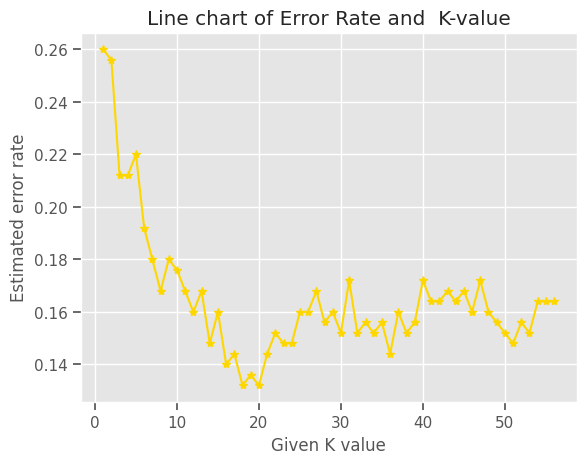

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith Plotted line chart using the information provided from 'for' loop.
plt.plot(range(1, 57), vars_error_rate, marker='*', color='gold')
plt.title('Line chart of Error Rate and  K-value')                             # Title of the chart
plt.xlabel('Given K value')                                                    # X-label
plt.ylabel('Estimated error rate')                                             # Y-label


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created a varshith_knn model with n_neighbors=1

vars_knn = KNeighborsClassifier(n_neighbors = 19)

# Varshith printed K value
print('K=19')

K=19


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith fitted KNN model to training data
vars_knn.fit(kkr_train, mi_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith used predict() to predict values
mi_predict = vars_knn.predict(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith imported confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Varshith printed confusion matrix
print(confusion_matrix(mi_test,mi_predict))

[[108  20]
 [ 14 108]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed classification_report
print(classification_report(mi_test,mi_predict))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       128
           1       0.84      0.89      0.86       122

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



Retrain with new K Value.

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created a varshith_knn model with n_neighbors=1

vars_knn = KNeighborsClassifier(n_neighbors = 21)
print('K=21')

K=21


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith fitted KNN model to training data
vars_knn.fit(kkr_train, mi_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith used predict() to predict values
mi_predict = vars_knn.predict(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith imported confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Varshith printed confusion matrix
print(confusion_matrix(mi_test,mi_predict))

[[106  22]
 [ 14 108]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed classification_report
print(classification_report(mi_test,mi_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       128
           1       0.83      0.89      0.86       122

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



##ROC(**bonus**)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Varshith created a varshith_knn model with n_neighbors=1
vars_knn = KNeighborsClassifier(n_neighbors = 19)
print('K=19')



K=19


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith fitted KNN model to training data
vars_knn.fit(kkr_train, mi_train)

# Varshith used predict() to predict values
mi_predict = vars_knn.predict(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix

# Varshith printed confusion matrix
print(confusion_matrix(mi_test,mi_predict))

[[108  20]
 [ 14 108]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned confusion_matrix to vars_confusion_matrix
vars_confusion_matrix=confusion_matrix(mi_test,mi_predict)

# Varshith assignes values of Confusion Matrix to true_positive, false_positive, false_negative, true_positive
true_negative, false_positive, false_negative, true_positive = vars_confusion_matrix.flatten()

print(true_negative)     # Prints True Negative Value
print(false_positive)    # Prints False Positive Value
print(false_negative)    # Prints False Negative Value
print(true_positive)     # Prints True Positive Value

108
20
14
108


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith Calculated True Positive Rate and False Positive Rate
true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print(true_positive_rate)       # Print True Positive Rate
print(false_positive_rate)      # Print False Positive Rate



0.8852459016393442
0.15625


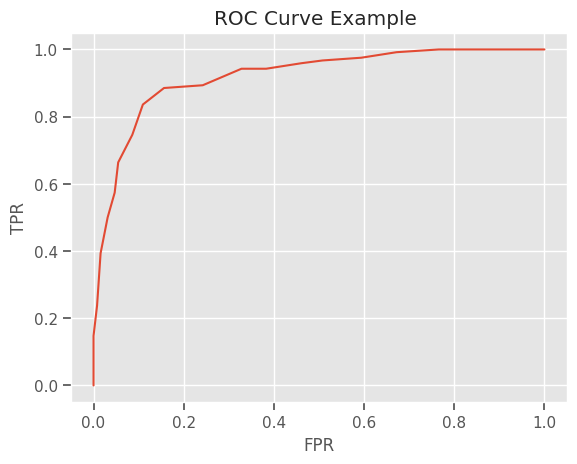

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith Predicted Probabilities of KNN Model using predict_proba()
vars_p_probabilities = vars_knn.predict_proba(kkr_test)[:, 1]


# Varshith calculated ROC Curve using mi_test and vars_p_probabilities
false_positive_rate, true_positive_rate,_  = roc_curve(mi_test, vars_p_probabilities)

# Varshith Plot the ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

plt.title('ROC Curve Example ')      # Title of plot
plt.xlabel('FPR')                 # X-label
plt.ylabel('TPR')                  # Y-label

# Varshith displayed output
plt.show()

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the Area Under Curve of ROC
vars_auc = auc(false_positive_rate, true_positive_rate)

# Varshith printed the AUC
print(vars_auc)

0.9194415983606558
